Name: Lindgren, Eric
PSN: 970222-1954


# Problem 1

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Problem 2

In [2]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)

# X are picked uniform random [0,2]
X = 2 * np.random.rand(100, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X + 2 + 0.2 * np.random.randn(100, 1)

### a) Perform a linear regression using the Normal Equation

The normal equation for linear regression, i.e. the function that calculates 
the vector $\vec{\theta}$ thet gives the $min(\epsilon)$, can be shown to be $\theta = (X^T X)^{-1}(X^T \cdot y)$. 

In [3]:
# First, create the design matrix. 
# The polynomial is quadratic, our model only 
# has three features: X^0, X^1, X^2
m = len(X)
X_d = np.concatenate((X**0, X**1, X**2), axis=1)


# Assuming that X_d is invertible, we can solve
# the normal equation as follows:
inv = np.linalg.inv
theta = inv(X_d.T.dot(X_d)).dot(X_d.T.dot(y))
display(rf'$\theta $ =  {theta}')



'$\\theta $ =  [[2.11228054]\n [0.72777588]\n [0.61621274]]'

### b) Comparisons

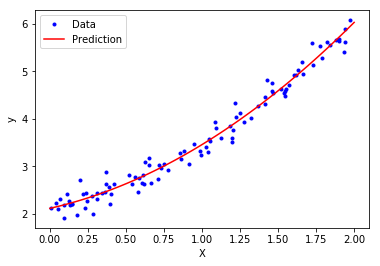

In [4]:

# y = 0.62X^2 + 0.73X + 2.11. This is compared to the "real" parameters:
# y_real = 0.5X^2 + 1X + 2
# Plot data and prediction
X_predict = np.linspace(0,2, m)
y_predict = theta[0] + theta[1]*X_predict + theta[2]*X_predict**2
fig, ax = plt.subplots(1,1)
ax.plot(X, y, 'b.', label="Data")
ax.plot(X_predict, y_predict, 'r-', label="Prediction")
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend(loc='best')

# Problem 3

### a) Perform linear regression with different models

In [20]:
# Load the data sets, and split it using the given command.
def load_data_from_file(file):
    datafile = f'DataFiles/{file}.dat'
    X, y = np.loadtxt(datafile, unpack=True)
    m = len(X)
    X = X.reshape(m,1); y = y.reshape(m,1)

    # built-in convenience function for splitting data
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.6, random_state=42)
    return {'X_train': X_train, 'X_val': X_val, 'y_train': y_train, 'y_val': y_val}

datafiles = ['dataset1', 'dataset2', 'dataset3']
datasets = {}

for file in datafiles:
    datasets[file] = load_data_from_file(file)

C:\Users\ericl\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
# Implement a function that calculates MSE
def calculate_MSE(y, y_predict):
    m = len(y)
    return 1/m * (y-y_predict).T.dot(y-y_predict)

In [7]:
# Perform linear regression using scikit learn with polynomials of orders
# 1,2,3,4,5 and 20.
fit_coefficients = {}
MSE = {}
orders = [1,2,3,4,5,20]

# Fit data for each order for each of the three datasets
for dataset in datasets:
    data = datasets[dataset]
    MSE[dataset] = {}
    fit_coefficients[dataset] = {}
    for order in orders:
        # Use scikit builtin to generate design matrix easily
        poly_features = PolynomialFeatures(degree=order, include_bias=False)
        # Notice that we don't include the bias term (X^0) in the design matrix. It
        # will be added below.
        X_d_train = poly_features.fit_transform(data["X_train"])
        # Fit the model to the data
        lin_reg = LinearRegression()
        lin_reg.fit(X_d_train, data["y_train"])
        # Save the coefficients - append to dict after formating intercept
        fit_coefficients[dataset][order] = np.concatenate([[lin_reg.intercept_], lin_reg.coef_], axis=1)
        # Calculate MSE - to do so generate a new design matrix to predict with
        X_d_val = poly_features.fit_transform(data["X_val"])
        y_predict = lin_reg.predict(X_d_val)
        MSE[dataset][order] = calculate_MSE(data["y_val"], y_predict)



In [8]:
# Print results for each dataset and each order
print('********* Fit Coefficients ***********')
display(fit_coefficients)
print('********* MSE ***********')
display(MSE)
# TODO print in a more descriptive fashion



********* Fit Coefficients ***********


{'dataset1': {1: array([[ 8.64449594, -1.23456593]]),
  2: array([[ 0.12905012, -0.6366678 ,  2.58692409]]),
  3: array([[ 0.041779  ,  1.26978243,  2.52600994, -0.33172737]]),
  4: array([[ 1.99354331,  0.99062846,  0.50868938, -0.24964384,  0.24951078]]),
  5: array([[ 1.99321069e+00,  9.82284423e-01,  5.09920902e-01,
          -2.45236024e-01,  2.49294053e-01, -4.41040648e-04]]),
  20: array([[ 1.96142660e+00,  1.01584020e+00,  9.46056377e-01,
          -4.15026161e-01, -1.41630078e+00,  1.57342336e-01,
           2.70365408e+00, -2.45487039e-02, -2.21424450e+00,
          -2.91883234e-02,  1.02081754e+00,  1.71706825e-02,
          -2.81717825e-01, -4.14136941e-03,  4.75237088e-02,
           5.17837350e-04, -4.79981603e-03, -3.29457649e-05,
           2.66446269e-04,  8.42698841e-07, -6.24904496e-06]])},
 'dataset2': {1: array([[2.92526837, 0.39697212]]),
  2: array([[1.05194098, 0.52850475, 0.56910183]]),
  3: array([[ 0.98685097,  1.95040555,  0.52366981, -0.24741449]]),
  4: ar

********* MSE ***********


{'dataset1': {1: array([[39.8789529]]),
  2: array([[4.11757722]]),
  3: array([[2.54406172]]),
  4: array([[0.00550791]]),
  5: array([[0.00561872]]),
  20: array([[0.00885626]])},
 'dataset2': {1: array([[3.1512768]]),
  2: array([[1.27826271]]),
  3: array([[0.13501289]]),
  4: array([[0.13769784]]),
  5: array([[0.14046792]]),
  20: array([[0.2214065]])},
 'dataset3': {1: array([[5.9775575]]),
  2: array([[3.88997846]]),
  3: array([[2.16020617]]),
  4: array([[2.20316537]]),
  5: array([[2.24748671]]),
  20: array([[3.54250393]])}}

Questions to ponder: 
1: Across all three datasets, the MSE is generally the lowest for the fourth
or the fifth order polynomial (fourth is somewhat lower). Since the MSE is calculated against the validation data, this indicates that a fourth (maybe fifth) order polynomial was used to generate the original data. It's the best performing model at the very least.

2: I'd say that that would be dataset three, since the MSE is generally larger for all orders model orders than for the other datasets. For orders 4-20, it's atleast an order of magnitude larger. Since the higher order models generally will overfit to the training data to a higher degree than lower order models, this higher MSE indicates that there is a larger discrepancy between the validation and training data in dataset three. This in turn could be due to a larger amount of random noise on the generated data, leading to a larger spread in the data. 

Another thing that would indicate this is that there are no verification questions regarding the fit on dataset three on OpenTA. This could possibly be due to the variances in the fit parameters being too large. ;)

# Problem 4


# Problem 5

In [24]:
datafile = 'DataFiles/dataset3.dat'
X, y = np.loadtxt(datafile, unpack=True)
m = len(X)
X = X.reshape(m,1); y = y.reshape(m,1)

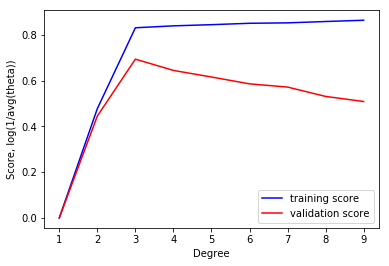

In [82]:
degrees = [i for i in range(1,10)]

# Implement MSE from before as error function

# Define figure to plot in 
fig, ax = plt.subplots(1,1)

k = 5;  # K-fold cross validation - number of folds
train_scores = np.zeros((len(degrees),1))
val_scores = np.zeros((len(degrees),1))

for i in range(len(degrees)):
    degree = degrees[i]
    # Split data into k batches - (k-fold cross validation)
    X_k = [X[i*int(m/k):(i+1)*int(m/k)] for i in range(k)]  # Split into k parts
    y_k = [y[i*int(m/k):(i+1)*int(m/k)] for i in range(k)]
    #X_k = X_k.reshape(len(X_k),1); y_k = y_k.reshape(len(y_k),1)
    MSE_trains = np.zeros((k,1))
    MSE_vals = np.zeros((k,1))
    for idx in range(len(X_k)):
        x_val = X_k[idx]
        y_val = y_k[idx]
        x_train = np.concatenate([X_k[:idx], X_k[idx+1:]], axis=None)  # Get all other than training set
        y_train = np.concatenate([y_k[:idx], y_k[idx+1:]], axis=None)
        x_train = x_train.reshape(len(x_train),1); y_train = y_train.reshape(len(y_train),1)
        # Reshape x_train and x_val for fit_transform
        # Define the design matrix
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_d_train = poly_features.fit_transform(x_train)
        # Fit the model to the data
        lin_reg = LinearRegression()
        lin_reg.fit(X_d_train, y_train)
        # Perform the calculation of MSE for training and validation sets
        # Calculate MSE - to do so generate a new design matrix to predict with
        # Training score
        y_predict_train = lin_reg.predict(X_d_train)
        MSE_train = calculate_MSE(y_train, y_predict_train)
        # Validation score
        X_d_val = poly_features.fit_transform(x_val)  # Create a new design matrix for validation
        y_predict_val = lin_reg.predict(X_d_val)
        MSE_val = calculate_MSE(y_val, y_predict_val)
        # Append scores
        MSE_trains[idx] = MSE_train
        MSE_vals[idx] = MSE_val
    # Calculate the means of trains and vals
    train_scores[i] = np.average(MSE_trains)
    val_scores[i] = np.average(MSE_vals)

# Norm train_scores, and calculate the score. My score is defined as
# log(1/norm(average(MSE))).
train_scores = train_scores/(np.amax(train_scores))
val_scores = val_scores/(np.amax(val_scores))


# Plot                   
ax.plot(degrees, np.log(1/train_scores), 'b', label='training score')
ax.plot(degrees, np.log(1/val_scores), 'r', label='validation score')
ax.set_xlabel('Degree')
ax.set_ylabel('Score, log(1/avg(theta))')
ax.legend(loc='best');


From the validation curves above it seems as though the validation score is the highest (error the lowest) for a 3rd degree polynomial. For higher degrees the validation decreases, indicating that the model is overfitting to the data. This is further indicated by the training score, which hits a plateu and stops increasing as much for higher degree polynomials than 3. 

This conclusion is not entirely in line with problem 3, where I maintained that the polynomial was of order 4 or 5. It's interesting that I got a different answer in this problem, but it could be due to the fact that I've used k-fold cross validation here. That gives me a more stable answer for the losses and thus the score, than the single training split as was used in problem 3. It's possible that the split in problem 3 is more reminiscant of a 4th or 5th degree polynomial than what is actually the case. Or I've simply made a mistake somewhere. :)

# Problem 6

In [109]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)

# X are picked uniform random [0,2]
X = 2 * np.random.rand(100, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X + 2 + 0.2 * np.random.randn(100, 1)

## Batch gradient descent


In [119]:
def plot_gradient_descent(theta, X, y, eta=0.1, theta_path=None,ax=None,n_iterations=1000):
    '''Plot the iterations of batch gradient descent.'''
    m = len(X)
    if not ax:
        fig,ax = plt.subplots(1,1)
    ax.plot(X, y, "b.")
    
    _X_d = np.c_[np.ones((m, 1)), X]  
    _X_predict = np.array([np.floor(min(X)),np.ceil(max(X))])
    _X_predict_d = np.c_[np.ones((2, 1)), X_predict]
    
    for iteration in range(n_iterations):
        if iteration < 10:
            _y_predict = _X_predict_d.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            ax.plot(_X_predict, _y_predict, style)
        gradients = 2/m * _X_d.T.dot(_X_d.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    ax.set_xlabel("$x_1$")
    ax.set_title(r"$\eta = {}$ (10 iter.)".format(eta))

In [136]:
# learning hyperparameter 
eta = 0.01
# number of iterations
n_iterations = 1000
m = len(X)
# Initial guess for parameter vector
theta = np.random.randn(3,1)  # 3 features in our data above

X_bgd = X.reshape(len(X), 1)
y_bgd = y.reshape(len(y), 1)

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_d = poly_features.fit_transform(X_bgd)

Use $\nabla \theta = \frac{2}{len(X)} X^T \cdot (X \theta - y)$

In [137]:
for iteration in range(n_iterations):
    gradients = 2/m * X_d.T.dot(X_d.dot(theta)-y)
    theta  = theta - eta*gradients

In [138]:
with np.printoptions(precision=4):
    print(theta)

[[ 3.2902]
 [ 1.2645]
 [-0.817 ]]


ValueError: all the input array dimensions except for the concatenation axis must match exactly

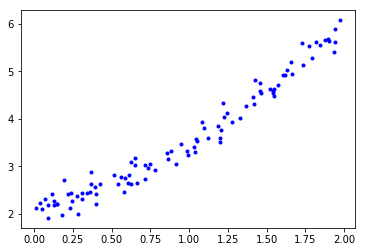

In [126]:
# Tune hyperparameter
etas = [0.02, 0.1, 0.5]
for eta in etas:
    plot_gradient_descent(theta, X, y, eta, n_iterations)

## Stochastic gradient descent